<h1>Genetic Algorithm to Solve RL problem</h1>

<h3>This is a basic project about evoilutionary computing in attempt to solve reinforcement learning</h3>

In this project we will be viewing neural networks models as "Individuals" and simulate Natural Selection and Evolution processes in hope the models will evolve and converge to an solution.

Common applications of a well trained reinforcement model will be:

Eg. Autonomous vehicle, gaming, finance management,energy management

We will implement this project from scratch and take small steps to ensure understanding.

<h3>Objectives:</h3>

1. Setting Up Environment
2. Select Enviroments
3. Define Evolutionary Functions
4. Evolution
5. Performance Visualisation

<h3>Section 1: Setting Up Environment</h3>

**For this project, we are using Python 3.11.7, aloneside with the following packages:**

1. gym = ^0.26.2
2. swig = ^4.1.1
3. box2d-py = ^2.3.8
4. pygame =^ 2.5.2
6. tensorflow = ^2.15.0
7. keras = ^2.15.0
8. numpy = ^1.26.3
9. matplotlib = ^3.8.2

**Use !pip install (package_name) if you do not have the packages**

In [1]:
import numpy as np 
import gym 
import keras
import random
import pickle
from IPython.display import clear_output
import matplotlib.pyplot as plt 

<h3>Section 2: Select Environment</h3>

**For this project we will be leveraging pre-built envionments from OpenAI's Gymnassium API**

**The environment of interest is CarRacing. Objective of the game is to have the car stay on track as much as possible** 

**Observation of the environment is a picture of the agent in its current situation**

**Actions that the agent can control are steering, accelerating and braking, represented by an array of 3 floating numbers**

In [2]:
env = gym.make('CarRacing-v2', render_mode='human')
env_training = gym.make('CarRacing-v2')
env_training.reset()

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 {})

**Let us visualise the possible action space of this environment**

In [5]:
env.action_space

Box([-1.  0.  0.], 1.0, (3,), float32)

**Let us visualise the observation return of the environment by taking a random step** 

In [4]:
env.reset()
obs, reward, done, trancated, info = env.step([0, 0, 0])
obs.shape

/Users/chenyijie/anaconda3/envs/machine_learning/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


(96, 96, 3)

<h3>Section 3: Define Evolutionary Functions</h3>

**We need multiple functions involving new agent generation, natural selection, mutation in order to simulate evolution**

**First we need a function that generate a defined individual, in our case, the neural network models**

**We can view the different layers in the model as genes, these weights and bias will be inherited to individuals' offsprings**

**As the observation is pictures in the form of RGB array, our individuals should prosess 'picture reading ability" (Convolutional layers) to extract features from the picture**

In [25]:
def make_individual():
    
    obs_input = keras.layers.Input(shape=(96,96,3), name="Observation")
    
    feature = keras.layers.Conv2D(32, (8, 8), strides=(4, 4), activation='relu', 
                                  kernel_initializer=keras.initializers.RandomNormal(mean=0, stddev=0.5))(obs_input)
    
    further_feature = keras.layers.Conv2D(64, (4, 4), strides=(2, 2), activation='relu', 
                                          kernel_initializer=keras.initializers.RandomNormal(mean=0, stddev=0.5))(feature)
    
    dense_connect = keras.layers.Flatten()(further_feature)
    
    dense = keras.layers.Dense(512, activation='relu', 
                               kernel_initializer=keras.initializers.RandomNormal(mean=0, stddev=0.5))(dense_connect)
    
    output_steering = keras.layers.Dense(1, activation='tanh', 
                                         kernel_initializer=keras.initializers.RandomNormal(mean=0, stddev=0.5), 
                                         kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4))(dense)
    
    output_acceleration = keras.layers.Dense(1, activation='sigmoid', 
                                             kernel_initializer=keras.initializers.RandomNormal(mean=0, stddev=0.5), 
                                             kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4))(dense)
    
    output_braking = keras.layers.Dense(1, activation='sigmoid', 
                                        kernel_initializer=keras.initializers.RandomNormal(mean=0, stddev=0.5), 
                                        kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4))(dense)
    
    model = keras.models.Model(inputs=obs_input, outputs=(output_steering, output_acceleration, output_braking))

    return model

# model._name = "individual"
# model.layers[1]._name = "gene_1"
# model.layers[2]._name = "gene_2"
# model.layers[4]._name = "gene_3"
# model.layers[5]._name = "gene_4"
# model.layers[6]._name = "gene_5"
# model.layers[7]._name = "gene_6"

**Let us call our function, make a individual and view its structure**

In [26]:
indiv_testing = make_individual()
indiv_testing.summary()

Model: "model_2880"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Observation (InputLayer)    [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 conv2d_5760 (Conv2D)        (None, 23, 23, 32)           6176      ['Observation[0][0]']         
                                                                                                  
 conv2d_5761 (Conv2D)        (None, 10, 10, 64)           32832     ['conv2d_5760[0][0]']         
                                                                                                  
 flatten_2880 (Flatten)      (None, 6400)                 0         ['conv2d_5761[0][0]']         
                                                                                         

**We can use the plot_Model function to visualise the exact shape of the individual**

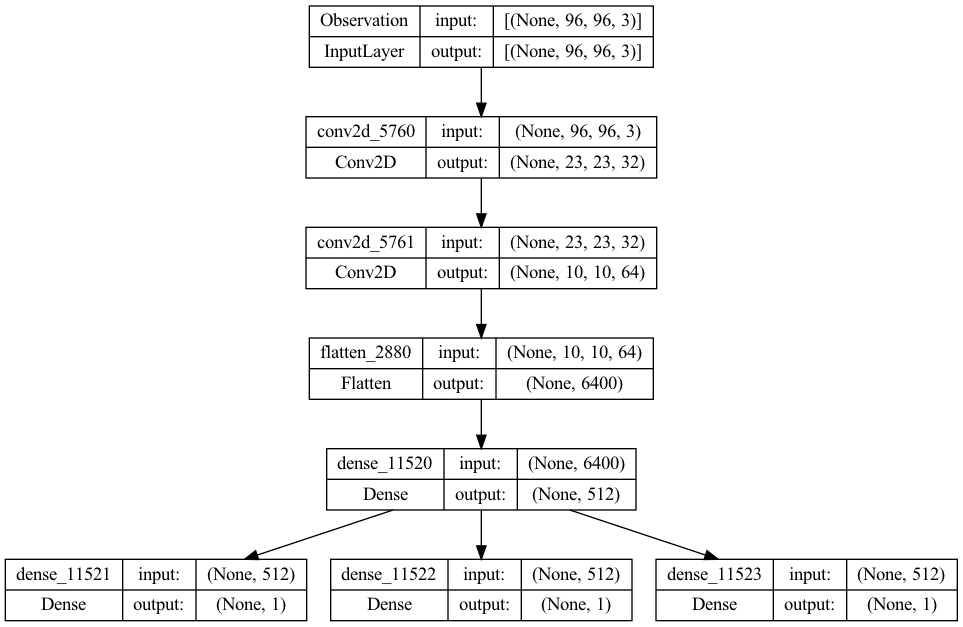

In [27]:
keras.utils.plot_model(indiv_testing, show_shapes=True)

**As mentioned, each layers can be viewed as individual's genes. Each gene consist of a tuple of weights and bias**

In [5]:
gene1 = indiv_testing.layers[1].get_weights()
gene2 = indiv_testing.layers[2].get_weights()
gene3 = indiv_testing.layers[4].get_weights()
gene4 = indiv_testing.layers[5].get_weights()
gene5 = indiv_testing.layers[6].get_weights()
gene6 = indiv_testing.layers[7].get_weights()

gene1[0].shape, gene1[1].shape, gene2[0].shape, gene2[1].shape, gene3[0].shape, gene3[1].shape, gene4[0].shape, gene4[1].shape, gene5[0].shape, gene5[1].shape, gene6[0].shape, gene6[1].shape

((8, 8, 3, 32),
 (32,),
 (4, 4, 32, 64),
 (64,),
 (6400, 512),
 (512,),
 (512, 1),
 (1,),
 (512, 1),
 (1,),
 (512, 1),
 (1,))

**Let us test if the individual is able to decide an action to take from the pictorial input**

In [7]:
obs = env_training.reset()
obs = np.expand_dims(obs[0], axis=0)    #Neural Networks requires a batch input, thus we need to expand the dimensions of the observation
steering, accel, brake = indiv_testing.predict(obs, verbose=0)

action = [steering[0][0], accel[0][0], brake[0][0]]     #The return of the predict function is a list of lists, thus we need to index it twice to get the floating value
obs, reward, done, trancated, info = env_training.step(action)
reward


/Users/chenyijie/anaconda3/envs/machine_learning/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


7.562835249042146

**We can wrap what we did into a function that returns actions of approriate size and data type**

In [8]:
def get_action(obs, model):
    obs = np.expand_dims(obs, axis=0)
    steering, accel, brake = model.predict(obs, verbose=0)
    action = [steering[0][0], accel[0][0], brake[0][0]]
    return action

**We can not simply have one individual to simulate natural selesction and reproduction. To simulate evolution, we requires a population of individuals**

In [9]:
def get_population(population_size):
    population = []
    for i in range(population_size):
        model = make_individual()
        population.append(model)
    return population

**To ensure that our individuals can run in the environment properly, we put our individual into a proper game environment**

In [30]:
obs = env.reset()
steps = 0
total_reward = 0
while steps < 10000:
    obs, reward, done, trancated, info = env.step(env.action_space.sample())
    print (f'Step {steps}, Reward {reward}, Done sitruation is {done}, Trancated situation is {trancated}.')
    total_reward += reward
    steps += 1
    
    if done:
        break
    
    if trancated:
        break

print (f'Total reward is {total_reward}.')

Step 0, Reward 7.120216606498195, Done sitruation is False, Trancated situation is False.
Step 1, Reward -0.09999999999999964, Done sitruation is False, Trancated situation is False.
Step 2, Reward -0.09999999999999964, Done sitruation is False, Trancated situation is False.
Step 3, Reward -0.09999999999999964, Done sitruation is False, Trancated situation is False.
Step 4, Reward -0.09999999999999964, Done sitruation is False, Trancated situation is False.
Step 5, Reward -0.09999999999999964, Done sitruation is False, Trancated situation is False.
Step 6, Reward -0.09999999999999964, Done sitruation is False, Trancated situation is False.
Step 7, Reward -0.09999999999999964, Done sitruation is False, Trancated situation is False.
Step 8, Reward -0.09999999999999964, Done sitruation is False, Trancated situation is False.
Step 9, Reward -0.09999999999999964, Done sitruation is False, Trancated situation is False.
Step 10, Reward -0.09999999999999964, Done sitruation is False, Trancated

**We can see that each game only last 1000 steps. Similarly, we wrap the lines into a function**

In [10]:
def run_indivual(individual, environment, average_across):
    rewards = []
    for i in range(average_across):         #We will run the individual for a number of runs and average the reward to ensure fairness
        old_obs = environment.reset()[0]
        steps = 0
        total_reward = 0
        done = False
        trancated = False
        patience = 0
        while True:
            action = get_action(old_obs, individual)
            obs, reward, done, trancated, info = environment.step(action)
            total_reward += reward
            steps += 1
            # print (f'Step {steps}, Reward {reward}, Done sitruation is {done}, Trancated situation is {trancated}.')
            
            if np.all(old_obs == obs):
                # print (f'car not moving, patience {patience}.')
                patience += 1
                if patience > 50:           #If the car is not moving for 50 steps, we will break the loop
                    trancated = True
                    total_reward -= 200     #We will also introduce a penalty for the car not moving
            
            old_obs = obs
            
            if done:
                reward += 100               #We will introduce a reward for the car reaching the destination
                break

            if trancated:
                break
        
        rewards.append(total_reward)

    return np.mean(rewards)                 #We will return the average reward of the individual over the number of runs

**Let us test our function**

In [79]:
reward = run_indivual(indiv_testing, env, average_across=2)
print (f'Total reward is {reward}.')

Total reward is -81.58223211136095.


**We just have to iterate our run_individual function for everyone in the generaton, the return of the function should be a list of individuals sorted according to their rewards**

In [11]:
def run_population(population, env, AVERAGE_ACROSS):
    rewards = []
    i = 0 
    for individual in population:
        print (f'Running individual {i+1}.')
        reward = run_indivual(individual, env, average_across=AVERAGE_ACROSS)
        rewards.append(reward)
        i += 1
        
    return dict(sorted(zip(population, rewards), key=lambda x: x[1], reverse=True))

**Let us test our function and visualise the output**

In [85]:
population = get_population(5)
dictionary = run_population(population, env_training, 2)
dictionary

{<keras.src.engine.functional.Functional at 0x32fb88250>: -83.60021077761834,
 <keras.src.engine.functional.Functional at 0x31546df50>: -85.91392116259686,
 <keras.src.engine.functional.Functional at 0x32fc05d10>: -86.02609437873366,
 <keras.src.engine.functional.Functional at 0x31f7566d0>: -203.1500228427078,
 <keras.src.engine.functional.Functional at 0x333a45610>: -203.48990841456526}

**We can define a function that choose the top few individuals of every population to survive**

In [12]:
def survival_of_the_fittest(indiv_and_rewards , survival_rate):     #Survival rate is a percentage of the population that will survive
    fittest = list(indiv_and_rewards.keys())[:int(survival_rate*len(population))]   #The integer number of the population that will survive
    return fittest

**Similarly, let us test the function.**

In [119]:
survivals = survival_of_the_fittest(dictionary, 0.4)
survivals

**Now we will proceed to the reproduction step**

**Remember that we are seeing our neural network layers as genes**

**Each gene contains list of weights and biases which are just numbers, we can generate a new gene of a similar shape by taking parts from both gene**

In [103]:
indiv_testing = make_individual()
indiv_testing2 = make_individual()
newborn = make_individual()

gene6_1 = indiv_testing.layers[7].get_weights()
gene6_2 = indiv_testing2.layers[7].get_weights()

split = np.random.randint(0, len(gene6_1[0]))
gene6 = [np.concatenate((gene6_1[0][:split], gene6_2[0][split:]), axis=0),random.choice([gene6_1[1], gene6_2[1]])]

newborn.layers[7].set_weights(gene6)

**We can proceed to wrap the codes into a function call gene_crossover**

**We will take into account mutation as well. A gene can mutate by returning a gene with newly initialised genes. This is to introduce some disturbance to the evolution process, it will be needed as it might be able to get the models out of a local minimum**

In [13]:
def gene_crossover(parent1_gene, parent2_gene, newborn_gene, mutation_rate):
    split = np.random.randint(0, len(parent1_gene[0]))
    gene = [np.concatenate((parent1_gene[0][:split], parent2_gene[0][split:]), axis=0),random.choice([parent1_gene[1], parent2_gene[1]])]
    #As there is only one bias per layer, we will randomly choose between the biases of the two parents
    
    if np.random.rand() < mutation_rate:
        return newborn_gene
    
    else:
        return gene

**Finally we need a reproduction function that generate a new population base on the survivals.**

**We will further introduce variance into the system by having some immigrants with complete new set of genes.**

In [14]:
def reproduction(survivals, population_size,immigration_rate, mutation_rate):
    new_population = survivals
    immigrants_size = int(population_size*immigration_rate)
    
    while len(new_population) < (population_size-immigrants_size):
        parent1 = random.choice(survivals)
        parent2 = random.choice(survivals)
        newborn = make_individual()
        newborn_gene_1 = gene_crossover(parent1.layers[1].get_weights(), 
                           parent2.layers[1].get_weights(), 
                           newborn.layers[1].get_weights(), 
                           mutation_rate)
        newborn_gene_2 = gene_crossover(parent1.layers[2].get_weights(), 
                           parent2.layers[2].get_weights(), 
                           newborn.layers[2].get_weights(), 
                           mutation_rate)
        newborn_gene_3 = gene_crossover(parent1.layers[4].get_weights(),
                            parent2.layers[4].get_weights(), 
                            newborn.layers[4].get_weights(), 
                            mutation_rate)
        newborn_gene_4 = gene_crossover(parent1.layers[5].get_weights(),
                            parent2.layers[5].get_weights(), 
                            newborn.layers[5].get_weights(), 
                            mutation_rate)
        newborn_gene_5 = gene_crossover(parent1.layers[6].get_weights(),
                            parent2.layers[6].get_weights(), 
                            newborn.layers[6].get_weights(), 
                            mutation_rate)
        newborn_gene_6 = gene_crossover(parent1.layers[7].get_weights(),
                            parent2.layers[7].get_weights(), 
                            newborn.layers[7].get_weights(), 
                            mutation_rate)
        newborn.layers[1].set_weights(newborn_gene_1)
        newborn.layers[2].set_weights(newborn_gene_2)
        newborn.layers[4].set_weights(newborn_gene_3)
        newborn.layers[5].set_weights(newborn_gene_4)
        newborn.layers[6].set_weights(newborn_gene_5)
        newborn.layers[7].set_weights(newborn_gene_6)
        new_population.append(newborn)
        
    while len(new_population) < population_size:
        new_population.append(make_individual())
        
    return new_population

**Let us test our defined reproduction function**

In [150]:
new_population = reproduction(survivals, 5, 0.2, 0.1)
new_population

**The final step is to compile all the functions together to simulate evolution**

In [15]:
def evolution(population, population_size, env, generations, average_across, survival_rate, mutation_rate, immigration_rate, start_generation):
    i = start_generation
    for j in range(generations):
        print (f'Generation {i} started.')
        indiv_and_rewards = run_population(population, env, average_across)
        generational_reward = np.mean(list(indiv_and_rewards.values()))
        survivals = survival_of_the_fittest(indiv_and_rewards, survival_rate)
        population = reproduction(survivals, population_size, immigration_rate, mutation_rate)
        clear_output()   #This will clear the output of the previous generation, making the output more readable
        print (f'Generation {i} completed.')
        print (f'Best reward is {indiv_and_rewards[survivals[0]]}, Generational average is {generational_reward}.')
        training_log_dir = 'Training Logs'
        with open(f'{training_log_dir}/Generation_Average_{i}.pkl', 'wb') as f:
            pickle.dump(generational_reward, f)
        with open(f'{training_log_dir}/Best_Individual_Reward{i}.pkl', 'wb') as f:
            pickle.dump(indiv_and_rewards[survivals[0]], f)
        
        if (i)%5 == 0 and i != 0:
            with open(f'population_{i}.pkl', 'wb') as f:
                pickle.dump(population, f)
            
            with open(f'fittest_Gen{i}.pkl', 'wb') as f:
                pickle.dump(survivals[0], f)
        i += 1

<h3> Section 4: Evolution </h3>

**Now that we have our functions ready to simulate evolution, it is finally time to witness the magic of nature.**

**First we define every single hyperparameters for the ease of reading**

In [16]:
POPULATION_SIZE = 100
GENERATIONS = 100
STARTING_GENERATION = 5
AVERAGE_ACROSS = 2
SURVIVAL_RATE = 0.2
MUTATION_RATE = 0.01
IMMIGRATION_RATE = 0.1

**We can generate our population or load a pretrained generation**

In [6]:
# population = get_population(POPULATION_SIZE)

with open ('population_5.pkl', 'rb') as f:
    population = pickle.load(f)

**Let the evolution begin**

In [19]:
evolution(population, POPULATION_SIZE, env_training, GENERATIONS, AVERAGE_ACROSS, SURVIVAL_RATE, MUTATION_RATE, IMMIGRATION_RATE,STARTING_GENERATION)

Generation 40 completed.
Best reward is 243.8899904531131, Generational average is 71.61591280702542.
Generation 41 started.
Running individual 1.
Running individual 2.


KeyboardInterrupt: 

**The training evolution is stopped at episode 40 as the generations are close to converge and further training of generations are taking up too much computational resources. (Average of 5 hours per generation)**

**We can load the training logs to view the data**

In [23]:
best_indiv = []
Generation_Average = []
for i in range(40):
    with open(f'Training Logs/Best_Individual_Reward{i+1}.pkl', 'rb') as f:
        best_indiv.append(pickle.load(f))
    with open(f'Training Logs/Generation_Average_{i+1}.pkl', 'rb') as f:
        Generation_Average.append(pickle.load(f))

best_indiv, Generation_Average

([-38.14814814814847,
  -43.28821441175914,
  -19.28515517784736,
  -39.44185368697222,
  32.66609616648651,
  -35.07331378299134,
  -14.286415390656295,
  -0.28514936715726513,
  58.804610024126205,
  91.85006472873056,
  67.02263465409902,
  78.51361295069987,
  139.12762185733322,
  98.56266149871189,
  77.93242788191762,
  57.287157287156404,
  91.48224591981204,
  118.83470635131994,
  185.3210417741148,
  133.2707942464084,
  136.03441376551018,
  166.46192457565922,
  217.46431993544655,
  161.4526133821472,
  196.53308277843865,
  243.02107288684624,
  220.48963245268783,
  230.91861115347743,
  228.4612913588206,
  223.93582490958352,
  260.8755129958977,
  246.7800581771196,
  294.20630730091756,
  249.72866567355055,
  247.37158805756377,
  235.399159663869,
  281.4471217082257,
  266.1014886626404,
  247.93364046933115,
  243.8899904531131],
 [-167.56918558412676,
  -135.87146766357372,
  -118.99232905280924,
  -119.8375122097113,
  -118.22850580249977,
  -118.4009678026786

**Using matplotlib to visualise the training history**

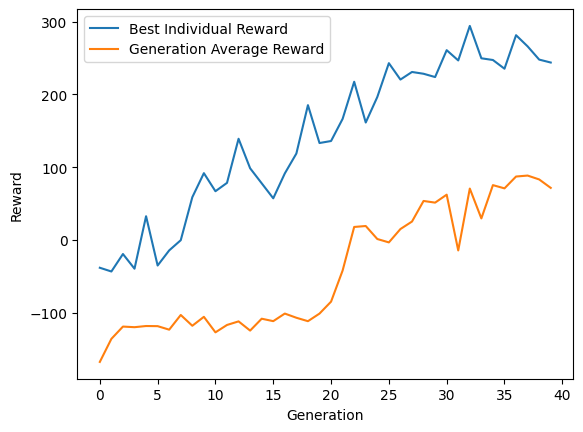

In [22]:
plt.plot(best_indiv, label='Best Individual Reward')
plt.plot(Generation_Average, label='Generation Average Reward')
plt.xlabel('Generation')
plt.ylabel('Reward')
plt.legend()
plt.show()